In [4]:
# main
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from datetime import datetime, date, timedelta

print('start',datetime.now())
fnames=glob.glob('/data/keeling/a/yulanh/f/OT_project/Aqua/monthly/*.hdf')

latres=1
lonres=1
xdim=int(360/lonres)
ydim=int(180/latres)

all_obsnum=np.zeros((ydim,xdim,12),'i')
all_num_bt180 = np.zeros((ydim,xdim,12),'i')
all_num_bt200 = np.zeros((ydim,xdim,12),'i')
all_num_bt210 = np.zeros((ydim,xdim,12),'i')
all_num_bt220 = np.zeros((ydim,xdim,12),'i')
all_num_bt230 = np.zeros((ydim,xdim,12),'i')
all_num_bt240 = np.zeros((ydim,xdim,12),'i')
all_num_cdtp = np.zeros((ydim,xdim,12),'i')
all_num_cdtp2 = np.zeros((ydim,xdim,12),'i')
all_num_cdtp5 = np.zeros((ydim,xdim,12),'i')
all_num_cdtp10 = np.zeros((ydim,xdim,12),'i')

for fname in fnames:

    hdf = h5py.File(fname,'r')
    obsnum=hdf['obs_num']
    obsnum=obsnum[:,:]
    all_obsnum=all_obsnum+obsnum
    
    num_bt180=hdf['num_bt180']
    num_bt180=num_bt180[:,:]
    all_num_bt180=all_num_bt180 + num_bt180
    
    num_bt200=hdf['num_bt200'][:,:]
    all_num_bt200=all_num_bt200 + num_bt200
    
    num_bt210=hdf['num_bt210'][:,:]
    all_num_bt210=all_num_bt210 + num_bt210
    
    num_bt220=hdf['num_bt220'][:,:]
    all_num_bt220=all_num_bt220 + num_bt220
    
    num_bt230=hdf['num_bt230'][:,:]
    all_num_bt230=all_num_bt230 + num_bt230
    
    num_bt240=hdf['num_bt240'][:,:]
    all_num_bt240=all_num_bt240 + num_bt240
    
    num_cdtp=hdf['num_cdtp'][:,:]
    all_num_cdtp=all_num_cdtp + num_cdtp
    
    num_cdtp2=hdf['num_cdtp2'][:,:]
    all_num_cdtp2=all_num_cdtp2 + num_cdtp2
    
    num_cdtp5=hdf['num_cdtp5'][:,:]
    all_num_cdtp5=all_num_cdtp5 + num_cdtp5
    
    num_cdtp10=hdf['num_cdtp10'][:,:]
    all_num_cdtp10=all_num_cdtp10 + num_cdtp10


print('finish',datetime.now())

start 2022-10-05 22:37:30.144873
finish 2022-10-05 22:37:30.227700


0.22944367511836047


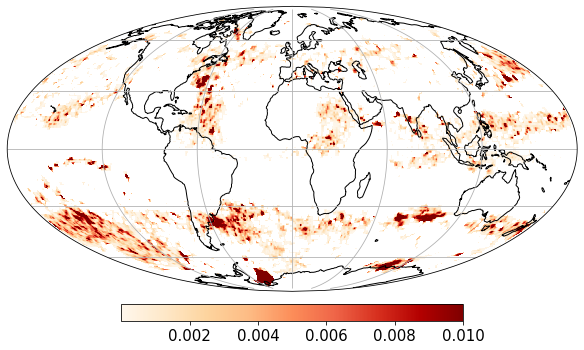

In [27]:
nvmin=0
nvmax=3000
fontsz=15

fig1,axs =plt.subplots(1,figsize=([8,15]),subplot_kw={'projection': ccrs.Mollweide()},constrained_layout=True)
img_extent=(-180,180,-90,90)
data= num_cdtp[:,:,0].astype('float')/all_obsnum[:,:,0]
print(np.max(data))
#print(data[90,:])
#data=data.T
#data=np.fliplr(data)
data[data <= 0.0]='nan'
s0=axs.imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmax=0.01,cmap='OrRd')
axs.coastlines(resolution='110m', color='black', linewidth=1)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
cb2=plt.colorbar(s0,ax=axs,orientation='horizontal',shrink=0.6,pad=0.01)
cb2.ax.tick_params(labelsize=fontsz)
#cb2.set_label(label='OT number',size=fontsz)